<a href="https://colab.research.google.com/github/quocbaodinhnho/quocbaotuan5/blob/main/baitaptuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

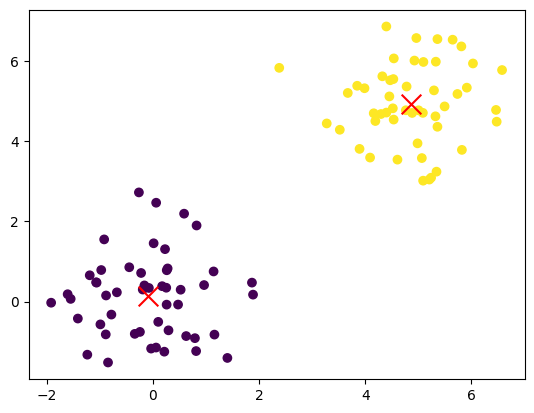

In [2]:
#bai1
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, k=2, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids randomly from data points
        random_indices = np.random.choice(len(X), self.k, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):
            # Step 1: Assign labels based on closest centroid
            labels = self._assign_labels(X)

            # Step 2: Recompute centroids
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.k)])

            # If centroids don't change, stop iterating
            if np.all(new_centroids == self.centroids):
                break

            self.centroids = new_centroids

    def _assign_labels(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        labels = np.argmin(distances, axis=0)
        return labels

    def predict(self, X):
        return self._assign_labels(X)

    def plot(self, X):
        labels = self.predict(X)
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', marker='x', s=200)
        plt.show()

# Example usage:
# Create sample data
np.random.seed(42)
X = np.concatenate([np.random.randn(50, 2) + np.array([5, 5]), np.random.randn(50, 2) + np.array([0, 0])])

# Apply k-means
kmeans = KMeans(k=2)
kmeans.fit(X)
kmeans.plot(X)


In [3]:
#Bai2
from collections import Counter
import numpy as np

class KNN:
    def __init__(self, k=3, weight_type='uniform'):
        self.k = k
        self.weight_type = weight_type

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _compute_distances(self, X_test):
        return np.linalg.norm(self.X_train - X_test, axis=1)

    def predict(self, X_test):
        y_pred = [self._predict_single(x) for x in X_test]
        return np.array(y_pred)

    def _predict_single(self, x):
        distances = self._compute_distances(x)
        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]

        if self.weight_type == 'uniform':
            # Uniform weighting: count the most frequent label
            most_common = Counter(k_nearest_labels).most_common(1)
            return most_common[0][0]
        elif self.weight_type == 'distance':
            # Distance-based weighting: inverse of distance
            weights = 1 / (distances[k_indices] + 1e-5)  # Prevent division by zero
            weighted_votes = Counter()
            for label, weight in zip(k_nearest_labels, weights):
                weighted_votes[label] += weight
            return weighted_votes.most_common(1)[0][0]

# Example usage:
X_train = np.array([[1, 2], [2, 3], [3, 3], [6, 6], [7, 7], [8, 8]])
y_train = np.array([0, 0, 0, 1, 1, 1])
X_test = np.array([[5, 5]])

knn = KNN(k=3, weight_type='distance')
knn.fit(X_train, y_train)
print("Predicted class:", knn.predict(X_test))


Predicted class: [1]


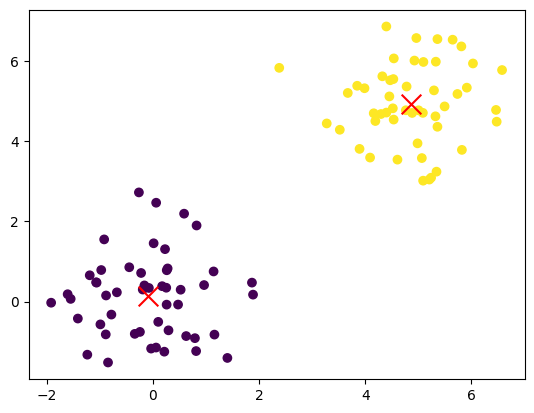

Predicted labels (k-NN): [1 0]


In [4]:
#Bai3
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# KMeans class from previous code
# KNN class from previous code

# Generate synthetic data for demonstration
np.random.seed(42)
X = np.concatenate([np.random.randn(50, 2) + np.array([5, 5]), np.random.randn(50, 2) + np.array([0, 0])])
y = np.array([0] * 50 + [1] * 50)  # Labels for classification task

# 1. K-means clustering demo
kmeans = KMeans(k=2)
kmeans.fit(X)
kmeans.plot(X)

# 2. k-NN classification demo
X_test = np.array([[2, 2], [6, 6]])
knn = KNN(k=3, weight_type='uniform')
knn.fit(X, y)
print("Predicted labels (k-NN):", knn.predict(X_test))


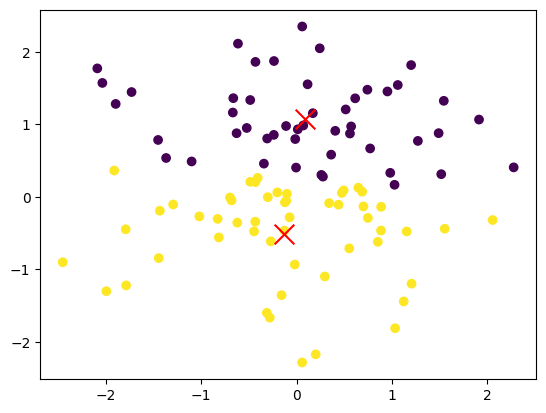

Predicted labels for new data points: [1 1]


In [5]:
#bai4
# KMeans and KNN classes (from previous code)

# Generating synthetic data for demo
X = np.random.randn(100, 2)
y = np.array([0] * 50 + [1] * 50)  # Binary labels

# K-means clustering
kmeans = KMeans(k=2)
kmeans.fit(X)
kmeans.plot(X)

# Classify new points using k-NN
X_test = np.array([[0.5, 0.5], [-0.5, -0.5]])
knn = KNN(k=3, weight_type='distance')
knn.fit(X, y)
predictions = knn.predict(X_test)
print("Predicted labels for new data points:", predictions)


In [6]:
#Bai5
from sklearn.tree import DecisionTreeClassifier

# Decision Tree demo
clf = DecisionTreeClassifier()
clf.fit(X, y)
predictions_tree = clf.predict(X_test)
print("Predicted labels using Decision Tree:", predictions_tree)


Predicted labels using Decision Tree: [0 1]
